In [1]:
import pandas as pd
datapath="/Users/jasonmiller/Source/MachineLearning/datasets/housing/housing.csv"
all_data=pd.read_csv(datapath)

In [2]:
all_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
all_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
sts["total_bedrooms"].value_counts()

280.0     44
272.0     44
393.0     43
331.0     41
328.0     41
          ..
1710.0     1
1576.0     1
1288.0     1
1819.0     1
1351.0     1
Name: total_bedrooms, Length: 1810, dtype: int64

In [43]:
all_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


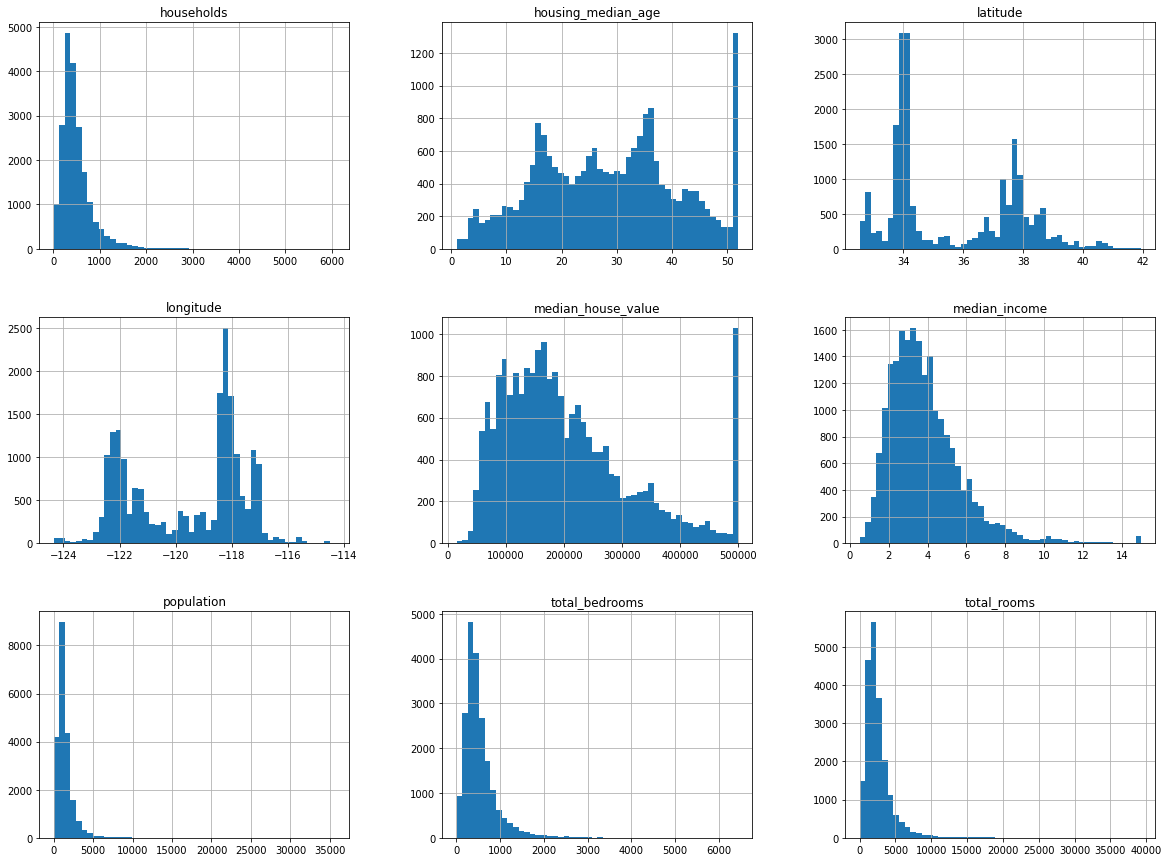

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
all_data.hist(bins=50,figsize=(20,15))
plt.show()
# Observe that median income is scaled and capped (last blip).
# Observe that median house value is capped (last blip) -- remove last bin from train & test data?
# The various different scales could cause a problem.
# Observe skew -- long right tails. Could be a problem for learners focused on mean.

In [17]:
# Avoid snooping bias. Put aside a test set at 1/5 of data.
# Use a random number seed for reproducibility.
# First method uses random splitting.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(all_data,test_size=0.2,random_state=42)
# Second method uses stratified splitting.
# The stratification makes sure each bin is representative for some attribute.
# Add a column for median_income category.
import numpy as np
all_data["income_cat"]=pd.cut(all_data["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in splitter.split(all_data,all_data["income_cat"]):
    stratified_train_set = all_data.loc[train_index]
    stratified_test_set = all_data.loc[test_index]
# Quick look at the distribution. It is centered around 3. That is good.
stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

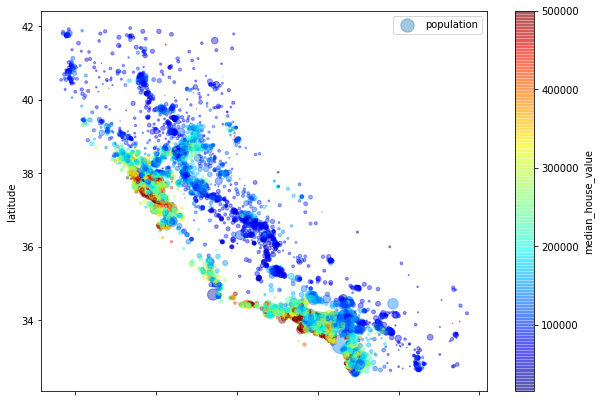

In [22]:
# Normally, make a copy or subset of training data for explaration.
sts=stratified_train_set.copy()
# Visualize. Size(s)=pop. Color(c)=prices. (x,y)=map coords.
sts.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=sts["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [23]:
# Look at correlation matrix. These tests for linear relationships only.
# County median house value correlates most closely to to county median income. (Helpful.)
# County total bedrooms correlates most closely to count total households. (Not helpful.)
sts.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b50d6a0>,
      dtype=object)

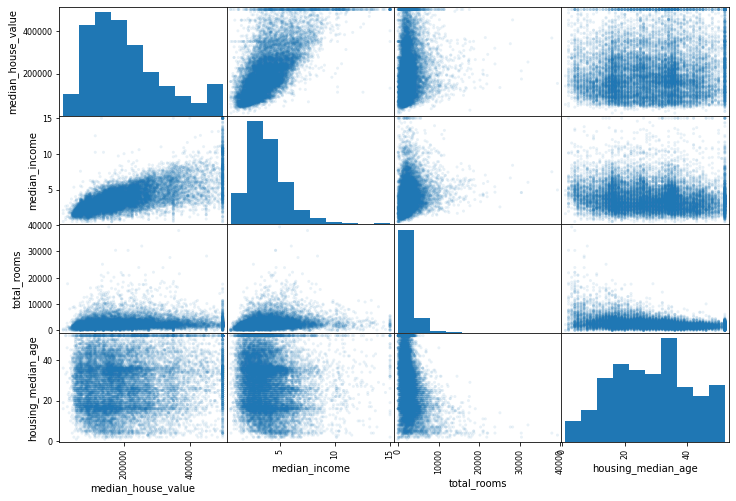

In [26]:
# Look for correlations graphically.
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(sts[attributes],figsize=(12,8),alpha=0.1)
# Note caps: solid lines where all larger values were lumped into max category.

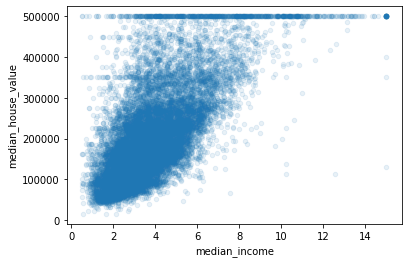

In [28]:
# Alternate: make plot with dataframe directly.
sts.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [41]:
# Invent new features as combinations of existing features.
sts["rooms_per_household"]=sts["total_rooms"]/sts["households"]
sts["bedrooms_per_room"]=sts["total_bedrooms"]/sts["total_rooms"]
sts["population_per_household"]=sts["population"]/sts["households"]
# Look at correlation of new features.
# Rooms per household correlates with county median income.
sts[sts.columns[5:]].corr(method="spearman")

,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
population,1.000000,0.904407,0.002155,0.001252,-0.108172,0.072652,0.246558
households,0.904407,1.000000,0.026962,0.110642,-0.112464,0.095741,-0.133812
median_income,0.002155,0.026962,1.000000,0.675727,0.646284,-0.747753,-0.044427
median_house_value,0.001252,0.110642,0.675727,1.000000,0.263424,-0.332618,-0.256604
rooms_per_household,-0.108172,-0.112464,0.646284,0.263424,1.000000,-0.888133,0.015461
bedrooms_per_room,0.072652,0.095741,-0.747753,-0.332618,-0.888133,1.000000,-0.077064
population_per_household,0.246558,-0.133812,-0.044427,-0.256604,0.015461,-0.077064,1.000000


In [48]:
# Return to issue of missing data.
sts["total_bedrooms"].isnull().sum()

158

In [51]:
# Must fix this.
# Encode the fix so it can apply to train and test data.
# Generalize the fix to all columns since real data could have NaN anywhere.
# Choice 1 = remove whole rows i.e. data points: sts.dropna(subset=["total_bedrooms"])
# Choice 2 = remove whole columns i.e. features: sts.drop("total_bedrooms",axis=1)
# Choice 3 = change NaN to 3000 i.e. sts["total_bedrooms"].fillna(3000,inplace=True)
# Choice 4 = use an imputer. Hits every column. Requires us to put aside non-numeric columns.
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
numeric_only = sts.drop("ocean_proximity",axis=1)
imputer.fit(numeric_only)
numpy_array = imputer.transform(numeric_only)  # replace NaN with column median in every column
numeric_sts = pd.DataFrame(numpy_array,columns=numeric_only.columns,index=numeric_only.index)
numeric_sts["total_bedrooms"].isnull().sum()

0

In [ ]:
# Next tackle the dropped non-numeric column. Finally, combine them all.